In [1]:
from read_penguin import load_2D_data
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import geometry as geo
from Interpolate import *
from Search import binSearch
import time

In [9]:
def temperature(x, y, data):
    #Parsing relevant parts of data input
    xVals = data[1]
    yVals = data[2]
    dens = data[3]
    pressures = data[4]
    
    #Finding indices in the data between which the target points lie
    xPoints = binSearch(xVals, 0, len(xVals), x)
    yPoints = binSearch(yVals, 0, len(yVals), y)
    
    #Applying Polar Boundary Conditions (y in this case is angle, so it should be periodic but x is radius so anything outside of data set is made to be 0)
    if(xPoints[0] == -np.infty):
        return 0
    elif(xPoints[1] == np.infty):
        return 0
    if(yPoints[0] == -np.infty):
        yPoints = (0, len(yVals)-2)
    elif(yPoints[1] == np.infty):
        yPoints = (len(yVals)-2, 0)
    
    #Setting up grid points for interpolation (these are the indices of the square lattice points)
    lowx = xPoints[0]
    highx = xPoints[1]
    lowy = yPoints[0]
    highy = yPoints[1]
    
    targetCoords = (x,y)
    minCoords = (xVals[lowx], yVals[lowy])
    maxCoords = (xVals[highx], yVals[highy])
    
    #Creating values at each square lattice point and interpolating
    densquareVals = [dens[lowy,lowx], dens[highy,lowx], dens[lowy,highx], dens[highy,highx]]
    pressuresquareVals = [pressures[lowy,lowx], pressures[highy,lowx], pressures[lowy,highx], pressures[highy,highx]]
    
    den = biInterpolate(targetCoords, densquareVals, minCoords, maxCoords)
    pressure = biInterpolate(targetCoords, pressuresquareVals, minCoords, maxCoords)
    temp = pressure/den
    return temp

In [15]:
#Loading Data
xres = 384
yres = 768
filepath = "/home/afkirby/penguinPlots/2DGammaChange/"
dataf = load_2D_data("/scratch/afkirby/2DAdiabaticParameterChange/Gamma1.5/", xres, yres, "h50_1p1J_e0_PPM4", 100)
datai = load_2D_data("/scratch/afkirby/2DAdiabaticParameterChange/Gamma1.5/", xres, yres, "h50_1p1J_e0_PPM4", 0)
data1 = load_2D_data("/scratch/afkirby/2DAdiabaticParameterChange/Gamma1.5/", xres, yres, "h50_1p1J_e0_PPM4", 1)
data10 = load_2D_data("/scratch/afkirby/2DAdiabaticParameterChange/Gamma1.5/", xres, yres, "h50_1p1J_e0_PPM4", 10)
data50 = load_2D_data("/scratch/afkirby/2DAdiabaticParameterChange/Gamma1.5/", xres, yres, "h50_1p1J_e0_PPM4", 50)

In [4]:
#Planetary Coordinates/Velocity
planetCoords = (1, np.pi)
planetCoordsCart = geo.sphericalToCartesian(planetCoords, dim = 2)
planetVel = (0, 1)
planetVelCart = geo.sphericalToCartesianVelocity(planetCoords, planetVel, dim = 2)

In [16]:
#Creating Corotating Cartesian Grid
coordX = np.ndarray(1001)
coordY = np.ndarray(1001)
for i in range(1001):
    coordX[i] = -datai[1][-1] + 2*datai[1][-1]*(i)/1000
    coordY[i] = -datai[1][-1] + 2*datai[1][-1]*(i)/1000
    

tempi = np.ndarray((1001,1001))
tempf = np.ndarray((1001,1001))
temp1 = np.ndarray((1001,1001))
temp10 = np.ndarray((1001,1001))
temp50 = np.ndarray((1001,1001))

for i in range(1001):
    for j in range(1001):
        cartesian = (coordX[i], coordY[j])
        polar = geo.cartesianToSpherical(cartesian, 2)
        initial = temperature(polar[0], polar[1], datai)
        tempi[j,i] = initial
        final = temperature(polar[0], polar[1], dataf)
        tempf[j,i] = final
        one = temperature(polar[0], polar[1], data1)
        temp1[j,i] = one
        ten = temperature(polar[0], polar[1], data10)
        temp10[j,i] = ten
        fifty = temperature(polar[0], polar[1], data50)
        temp50[j,i] = fifty
        

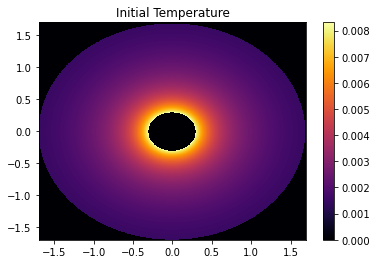

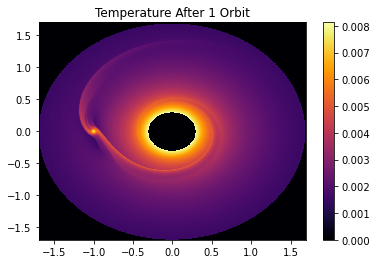

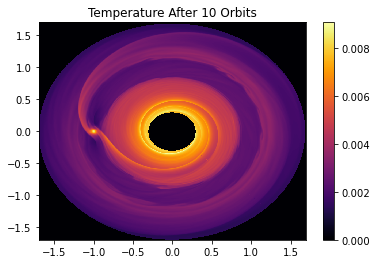

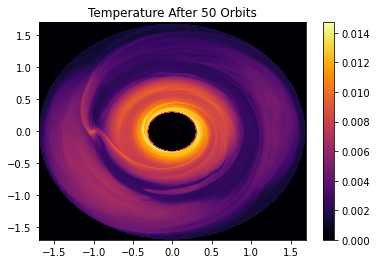

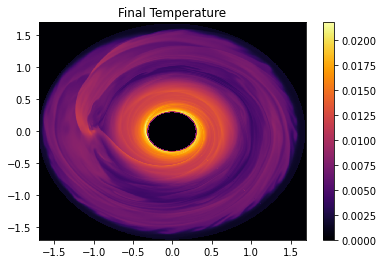

In [17]:
plt.pcolor(coordX,coordY,tempi, cmap="inferno")
plt.title("Initial Temperature")
plt.colorbar()
plt.show()

plt.pcolor(coordX,coordY,temp1, cmap="inferno")
plt.title("Temperature After 1 Orbit")
plt.colorbar()
plt.show()

plt.pcolor(coordX,coordY,temp10, cmap="inferno")
plt.title("Temperature After 10 Orbits")
plt.colorbar()
plt.show()

plt.pcolor(coordX,coordY,temp50, cmap="inferno")
plt.title("Temperature After 50 Orbits")
plt.colorbar()
plt.show()

plt.pcolor(coordX,coordY,tempf, cmap="inferno")
plt.title("Final Temperature")
plt.colorbar()
plt.show()